# Project: Wrangling and Analyze Data

## Data Gathering
 **All** three pieces of data for this project and use different gathering.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [125]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [126]:
# read the csv file onto a pandas dataframe
df_twitter=pd.read_csv('twitter-archive-enhanced.csv')

In [127]:
#checking how many tweet_ids are in df_twitter dataframe
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)


2356

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [128]:
URL="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(URL)
with open('image-predictions.tsv', mode='wb')as file: 
    file.write(response.content)
    
df_images=pd.read_csv('image-predictions.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)



# authentication key and tokens

consumer_key = #

consumer_secret = #'

access_token = #
access_secret = #R

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)

# Create an API object

api = tweepy.API(auth_handler=auth, 
                 parser=tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)





# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [129]:
# create the df_twitter_api dataframe from data read from the tweet_json.txt

selected_attr=[]
with open('tweet_json.txt','r') as f:
    for line in f:
        json_data=json.loads(line)
        selected_attr.append({'tweet_id':json_data['id'],
                             'favorites':json_data['favorite_count'],
                             'retweets':json_data['retweet_count'],
                             'timestamp':json_data['created_at']})
        
df_twitter_api=pd.DataFrame(selected_attr,
                                columns=['tweet_id',
                                                  'favorites',
                                                  'retweets',
                                                  'timestamp'])
        

## Assessing Data

### REQUIREMENTS
1.Keep only the original ratings which have images associated(no retweets and not data beyond August 2017)

2.Keep the rating system

3.Identify 8 quality issues and 2 tidiness issues


## My GOALS

1.Identifying most frequent dog names and breeds for the overall time period and also year by year

2.Identifying the type of relationship bewteen retweets and likes.

4.tweets, retweets and likes frequency year by year



### Programatic and visual assessment of df_twitter

In [130]:
df_twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [131]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [132]:
#observing the dog names and their frequency
df_twitter['name'].value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
Sadie            8
the              8
Toby             7
Buddy            7
an               7
Daisy            7
Bailey           7
Dave             6
Stanley          6
Milo             6
Koda             6
Bella            6
Jack             6
Rusty            6
Jax              6
Scout            6
Leo              6
Oscar            6
Chester          5
              ... 
Mollie           1
Laika            1
Chloe            1
Grey             1
Rilo             1
Puff             1
Todo             1
Sonny            1
Crumpet          1
Aiden            1
Mason            1
Remy             1
Jebberson        1
Norman           1
Kirk             1
Tonks            1
Clybe            1
Darrel           1
Kuyu             1
Brooks           1
Snoop            1
Darla       

In [133]:
#inquiring if there is any usable name in the text if I would create a rule for finding the name.
t=df_twitter[df_twitter.name=='a'].text.tail(7) 
print(t.tolist())

["This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0", 'My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O', 'Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt', 'This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe', 'This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx', 'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR', 'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI']


In [134]:
#looking if there is any duplicated ids
df_twitter.tweet_id.duplicated().sum()

0

In [135]:
#checking the counts of null for each column
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [136]:
#identify the tweet_ids that have a timestamp beyond August 1st 2017,all rows before and after this date have images, 
#so I dont have this time period as a criteria for keeping tweets or not
a=[]
a.append(df_twitter['tweet_id'].loc[df_twitter['timestamp']<'2017 August 1st 00:00:00 +0000'])#.count()
for i in a:
    i.isin(df_images['tweet_id'])
    print(True)
    

True


In [137]:
#281 row in df_twitter do not have a corresponding image in df_images and must be removed
(~df_twitter['tweet_id'].isin(df_images['tweet_id'])).sum()


281

### Programmatic and visual Assessment of df_images

In [138]:
df_images.head(1)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [139]:
#checking number of rows and columns in the dataframe
df_images.shape

(2075, 12)

In [140]:
#info on the columns an their datatypes
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [141]:
#checking for duplicate ids
df_images['tweet_id'].duplicated().sum()

0

In [142]:
#are all the images tweet_id in df_twitter?Yes
df_images['tweet_id'].isin(df_twitter['tweet_id']).count()

2075

### Programmatic and visual Assessment of df_twitter_api

In [143]:
df_twitter_api.head(1)

,tweet_id,favorites,retweets,timestamp
0,892420643555336193,34142,7078,Tue Aug 01 16:23:56 +0000 2017


In [144]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
tweet_id     2326 non-null int64
favorites    2326 non-null int64
retweets     2326 non-null int64
timestamp    2326 non-null object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


### Quality issues
Identifying missing records, invalid data, incorrect format, inconsistency issues. 

#### df_twitter
1.Drop columns in_reply_to_status_id and in reply_to_user_id and source,

2.Remove 181 retweets

3.Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

4.Convert timestamp to datetime datatype

5.Remove the 281 rows without images

6.Replace dog name where is a, None, the, an, for Unnamed 


#### df_images
7.Drop image_num 

8.Remove rows that don't correspond to a dog image or breed or are a broken link(this one wasn't fixed-but it's not relevant for my goals)

9.Convert timestamp to datetime datatype

10. Replace incorrect breed names with the correct one

11.Keep only the breed predicted with highest confidence


#### df_twitter_api
12.checking if there is common tweet_ids to df_twitter 

### Tidiness issues
1.Columns: doggo, pupper, puppo, floofer are values for the variable dog_stage

2.Separate dog data(name,breed,stage) from tweet data(likes,retweets,image,text,rating)

3.Create new one column breed with data retrieved from a set o columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [145]:
# Make copies of original pieces of data
twitter=df_twitter.copy()
images=df_images.copy()
twitter_api=df_twitter_api.copy()



### Issue #1:

#### Define:
Drop  columns in_reply_to_status_id, in_reply_to_user_id, source, expanded_url, irrelevant for my study

#### Code

In [146]:
twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [147]:
for col in twitter.columns:
    print(col)

tweet_id
in_reply_to_status_id
in_reply_to_user_id
timestamp
source
text
retweeted_status_id
retweeted_status_user_id
retweeted_status_timestamp
expanded_urls
rating_numerator
rating_denominator
name
doggo
floofer
pupper
puppo


In [148]:
twitter.drop('in_reply_to_status_id', axis=1, inplace=True)


In [149]:
twitter.drop('in_reply_to_user_id', axis=1, inplace=True)


In [150]:
twitter.drop('source', axis=1, inplace=True)


In [151]:
twitter.drop('expanded_urls', axis=1, inplace=True)


#### Test

In [152]:
twitter.head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None


In [153]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 239.4+ KB


### Issue #2:

#### Define
Remove all the retweets, about 181 rows

In [154]:
twitter.retweeted_status_id.notnull().sum()

181

In [155]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 239.4+ KB


#### Code

In [156]:
indexretweets=twitter[~twitter['retweeted_status_id'].isnull()].index

twitter.drop(indexretweets, inplace=True)


#### Test

In [157]:
twitter.retweeted_status_id.notnull().sum()

0

In [158]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 237.9+ KB


### Issue #3

#### Define
Remove:retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code

In [159]:
twitter.drop('retweeted_status_id', axis=1, inplace=True)


In [160]:
twitter.drop('retweeted_status_user_id', axis=1, inplace=True)


In [161]:
twitter.drop('retweeted_status_timestamp', axis=1, inplace=True)


#### Test

In [162]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


#### Issue #4

#### Define
change the timestamp from object to type datetime 

#### Code

In [163]:
twitter['timestamp']=pd.to_datetime(twitter['timestamp'])

#### Test

In [164]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


### Issue #5

#### Define
Remove 281 rows without images

In [165]:
twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### Code

In [166]:
indexes_no_img=twitter[(~twitter['tweet_id'].isin(images['tweet_id']))].index
twitter.drop(indexes_no_img, inplace=True)

#### Test

In [167]:
(~twitter['tweet_id'].isin(images['tweet_id'])).sum()

0

In [168]:
twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Issue #6

#### Define
Rename rows where name is None, a, an, such, to Unnamed

#### Code

In [169]:
twitter.loc[twitter['name']=='None','name']='Unnamed'
twitter.loc[twitter['name']=='such','name']='Unnamed'
twitter.loc[twitter['name']=='a','name']='Unnamed'
twitter.loc[twitter['name']=='an','name']='Unnamed'
twitter.loc[twitter['name']=='the','name']='Unnamed'

#### Test

In [170]:
twitter['name'].value_counts()

Unnamed        615
Charlie         11
Lucy            10
Cooper          10
Oliver          10
Penny            9
Tucker           9
Winston          8
Sadie            8
Toby             7
Daisy            7
Lola             7
Jax              6
Bo               6
Koda             6
Bella            6
Stanley          6
Bailey           5
Leo              5
Rusty            5
Scout            5
Oscar            5
Chester          5
Dave             5
Louis            5
Buddy            5
Milo             5
Gus              4
Finn             4
Archie           4
              ... 
Mauve            1
Gustaf           1
Pippin           1
Gin              1
Lupe             1
Meatball         1
Stark            1
infuriating      1
Odin             1
Milky            1
Aiden            1
Mason            1
Remy             1
Jebberson        1
Norman           1
Kirk             1
Tonks            1
Clybe            1
Darrel           1
Crumpet          1
Tyrone           1
Kuyu        

### Issue #7

#### Define
Drop the image_num column on the images dataframe

In [171]:
images.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Code

In [172]:
images.drop('img_num', axis=1, inplace=True)

#### Test

In [173]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


### Issue #8

### Define

Clean rows with values that don't represent images of dogs or dog breeds like 'hen', whose photos aren't from dogs and



### Code

In [174]:
#find and drop the row where breed is hen
indexes_hen=images[images['p1']=='hen'].index
images.drop(indexes_hen, inplace=True)

### Issue #9

#### Define
Replace incorrect dog breeds like 'desk' with the correct breed miniature_doberman


#### Code

In [175]:
# replace breed value with correct breed
images.loc[images['p2'] =='desk', 'p2'] = 'miniature_doberman'

In [176]:
#replace breed value with correct breed
images.loc[images['p2'] =='shopping_cart', 'p2'] = 'golden_retrievier'

#### Test

In [177]:
images.loc[images['p2'] =='desk', 'p2']

Series([], Name: p2, dtype: object)

In [178]:
images.loc[images['p2'] =='shopping_cart', 'p2'] 

Series([], Name: p2, dtype: object)

### Issue #10

#### Define
Create a unique breed column  


#### Code

In [179]:
# testing in are rows any probability is false
images[(images['p1_dog']==False) & (images['p2_dog']==False) & (images['p3_dog']==False)].head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


In [180]:
# creating a breed column and filling it with the most approprite value
def breed(row):
    if (row['p1_conf'] > row['p2_conf'] or row['p1_conf'] > row['p3_conf']) & row['p1_dog']==True :
        val = row['p1']
    elif (row['p2_conf'] > row['p1_conf'] or row['p2_conf'] > row['p3_conf']) & row['p2_dog']==True:
        val = row['p2']
    elif (row['p3_conf'] > row['p1_conf'] or row['p3_conf'] > row['p2_conf']) & row['p3_dog']==True:
        val = row['p3']
    else:
        val='Nan'   
    return val

#create new column 'breed' using the function above
images['breed']=images.apply(breed, axis=1)




In [181]:
#Remove all the rows that have all the px_dog False, 
#as most of them aren't available images or aren't dog images

index_not_dog=images[images['breed']=='Nan'].index
images.drop(index_not_dog, inplace=True)

In [182]:
#Now that we have a breed column we drop all these columns
images.drop('p1', axis=1, inplace=True)
images.drop('p1_conf', axis=1, inplace=True)
images.drop('p1_dog', axis=1, inplace=True)
images.drop('p2', axis=1, inplace=True)
images.drop('p2_conf', axis=1, inplace=True)
images.drop('p2_dog', axis=1, inplace=True)
images.drop('p3', axis=1, inplace=True)
images.drop('p3_conf', axis=1, inplace=True)
images.drop('p3_dog', axis=1, inplace=True)

In [183]:
#checking how many ids aren't in both dataframes
(~twitter['tweet_id'].isin(images['tweet_id'])).sum()

370

In [184]:
#drop the ids that are not present
indexes_no_dog_img=twitter[(~twitter['tweet_id'].isin(images['tweet_id']))].index
twitter.drop(indexes_no_dog_img, inplace=True)

#### Test

In [185]:
(~twitter['tweet_id'].isin(images['tweet_id'])).sum()

0

In [186]:
twitter.shape

(1624, 10)

In [187]:
images.shape

(1687, 3)

In [188]:
# verifying if the tweet where removed
images[(~images['tweet_id'].isin(twitter['tweet_id']))].head(4)#.sum()

,tweet_id,jpg_url,breed
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,kuvasz
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,golden_retriever
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,pug


In [189]:
# it's not present anymore
twitter[twitter['tweet_id']==759159934323924993]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [190]:
images.shape

(1687, 3)

In [191]:
#checking with the images dataframe to see if they have the same number of tweets
indexes_not_in_twitter=images[(~images['tweet_id'].isin(twitter['tweet_id']))].index
images.drop(indexes_not_in_twitter, inplace=True)

In [192]:
images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id    1624 non-null int64
jpg_url     1624 non-null object
breed       1624 non-null object
dtypes: int64(1), object(2)
memory usage: 50.8+ KB


In [193]:
(images['tweet_id'].isin(twitter['tweet_id'])).sum()

1624

### Test

In [194]:
images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id    1624 non-null int64
jpg_url     1624 non-null object
breed       1624 non-null object
dtypes: int64(1), object(2)
memory usage: 50.8+ KB


### Issue #10

### Define
Change Datetime with the correct datetype datetime

#### Code

In [195]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
tweet_id     2326 non-null int64
favorites    2326 non-null int64
retweets     2326 non-null int64
timestamp    2326 non-null object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [196]:
twitter_api['timestamp']=pd.to_datetime(twitter_api['timestamp'])

#### Test

In [197]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
tweet_id     2326 non-null int64
favorites    2326 non-null int64
retweets     2326 non-null int64
timestamp    2326 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 72.8 KB


### Issue #11

#### Define
checking if the dataframes twitter_api and twitter have the same tweet_ids and taking action to make it so

#### Code

In [198]:
(~twitter_api['tweet_id'].isin(twitter['tweet_id'])).sum()

711

In [199]:
#9 rows that do not have their tweet_ids in the twitter_api dataframe 
twitter[(~twitter['tweet_id'].isin(twitter_api['tweet_id']))]#.sum()


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
104,872261713294495745,2017-06-07 01:19:32,This is Harry. His ears are activated one at a...,13,10,Harry,None,None,None,None
253,844704788403113984,2017-03-23 00:18:10,This is Luna. It's her first time outside and ...,13,10,Luna,None,None,None,None
296,837366284874571778,2017-03-02 18:17:34,This is Lucy. She has a portrait of herself on...,13,10,Lucy,None,None,None,None
363,829374341691346946,2017-02-08 17:00:26,This is Astrid. She's a guide doggo in trainin...,13,10,Astrid,doggo,None,None,None
750,779123168116150273,2016-09-23 01:00:13,This is Reggie. He hugs everyone he meets. 12/...,12,10,Reggie,None,None,None,None
887,759923798737051648,2016-08-01 01:28:46,We only rate dogs... this is a Taiwanese Guide...,10,10,Unnamed,None,None,None,None
932,754011816964026368,2016-07-15 17:56:40,This is Charlie. He pouts until he gets to go ...,12,10,Charlie,None,None,None,None
1726,680055455951884288,2015-12-24 16:00:30,"Meet Sammy. At first I was like ""that's a snow...",10,10,Sammy,None,None,None,None
2114,670433248821026816,2015-11-28 02:45:17,This is Sam. He's trying to escape the inordin...,10,10,Sam,None,None,None,None


In [200]:
#keeping index info about the rows from twitter df that are not in the twitter_api df
tweets_without_likes=twitter[(~twitter['tweet_id'].isin(twitter_api['tweet_id']))].index

In [201]:
#Dropping the rows in twitter_api df which are not present at twitter df
index_api_not_in_twitter=twitter_api[(~twitter_api['tweet_id'].isin(twitter['tweet_id']))].index
twitter_api.drop(index_api_not_in_twitter,inplace=True)

#### Test

In [202]:
(~twitter_api['tweet_id'].isin(twitter['tweet_id'])).sum()

0

In [203]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 1 to 2325
Data columns (total 4 columns):
tweet_id     1615 non-null int64
favorites    1615 non-null int64
retweets     1615 non-null int64
timestamp    1615 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 63.1 KB


In [204]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 1 to 2355
Data columns (total 10 columns):
tweet_id              1624 non-null int64
timestamp             1624 non-null datetime64[ns]
text                  1624 non-null object
rating_numerator      1624 non-null int64
rating_denominator    1624 non-null int64
name                  1624 non-null object
doggo                 1624 non-null object
floofer               1624 non-null object
pupper                1624 non-null object
puppo                 1624 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 139.6+ KB


### Issue #11

### Define
Create a new column dog_stage with values from the collumns doggo, pupper, puppo, floofer

In [205]:
twitter['doggo'].value_counts()

None     1561
doggo      63
Name: doggo, dtype: int64

### Code

In [206]:
def dog_stage(row):
    if row['doggo']=='doggo':
        val = 'doggo'
    elif row['pupper']=='pupper':
        val = 'pupper'
    elif row['puppo']=='puppo':
        val = 'puppo'
    elif row['floofer']=='floofer':
        val='floofer'
    else:
        val='not_classified'
    return val

#create new column 'do_stage' using the function above
twitter['dog_stage']=twitter.apply(dog_stage, axis=1)


In [207]:
# remove the uncessary columns

twitter.drop('doggo', axis=1, inplace=True)
twitter.drop('pupper', axis=1, inplace=True)
twitter.drop('puppo', axis=1, inplace=True)
twitter.drop('floofer', axis=1, inplace=True)


#### Test

In [208]:
twitter['dog_stage'].value_counts()

not_classified    1371
pupper             162
doggo               63
puppo               21
floofer              7
Name: dog_stage, dtype: int64

In [209]:
twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,not_classified
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,not_classified
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,not_classified
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,not_classified
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,Unnamed,not_classified


In [210]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 1 to 2355
Data columns (total 7 columns):
tweet_id              1624 non-null int64
timestamp             1624 non-null datetime64[ns]
text                  1624 non-null object
rating_numerator      1624 non-null int64
rating_denominator    1624 non-null int64
name                  1624 non-null object
dog_stage             1624 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 101.5+ KB


### Issue #12

### Define
Join the dataframes twitter images and twitter_api

### Code

In [211]:
twitter.shape

(1624, 7)

In [212]:
twitter_api.shape

(1615, 4)

In [213]:
df=pd.merge(twitter, twitter_api, on='tweet_id', how='left').fillna(0)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 10 columns):
tweet_id              1624 non-null int64
timestamp_x           1624 non-null datetime64[ns]
text                  1624 non-null object
rating_numerator      1624 non-null int64
rating_denominator    1624 non-null int64
name                  1624 non-null object
dog_stage             1624 non-null object
favorites             1624 non-null float64
retweets              1624 non-null float64
timestamp_y           1624 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 139.6+ KB


In [214]:
df.shape

(1624, 10)

## MERGING THE DATAFRAMES

In [215]:
df=pd.merge(df,images,on='tweet_id', how='left').fillna(0)
df.head()

,tweet_id,timestamp_x,text,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,timestamp_y,jpg_url,breed
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,not_classified,29619.0,5343.0,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,not_classified,22303.0,3514.0,2017-07-31 00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,not_classified,37316.0,7285.0,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,not_classified,35655.0,7821.0,2017-07-29 16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,Unnamed,not_classified,17994.0,2628.0,2017-07-29 00:08:17,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever


In [216]:
df.shape

(1624, 12)

In [217]:
df.head()

,tweet_id,timestamp_x,text,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,timestamp_y,jpg_url,breed
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,not_classified,29619.0,5343.0,2017-08-01 00:17:27,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,not_classified,22303.0,3514.0,2017-07-31 00:18:03,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,not_classified,37316.0,7285.0,2017-07-30 15:58:51,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,not_classified,35655.0,7821.0,2017-07-29 16:00:24,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,Unnamed,not_classified,17994.0,2628.0,2017-07-29 00:08:17,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 12 columns):
tweet_id              1624 non-null int64
timestamp_x           1624 non-null datetime64[ns]
text                  1624 non-null object
rating_numerator      1624 non-null int64
rating_denominator    1624 non-null int64
name                  1624 non-null object
dog_stage             1624 non-null object
favorites             1624 non-null float64
retweets              1624 non-null float64
timestamp_y           1624 non-null object
jpg_url               1624 non-null object
breed                 1624 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 164.9+ KB


In [219]:
#Timestamp column is repeated 
df.drop('timestamp_y', axis=1, inplace=True)

### Test

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 11 columns):
tweet_id              1624 non-null int64
timestamp_x           1624 non-null datetime64[ns]
text                  1624 non-null object
rating_numerator      1624 non-null int64
rating_denominator    1624 non-null int64
name                  1624 non-null object
dog_stage             1624 non-null object
favorites             1624 non-null float64
retweets              1624 non-null float64
jpg_url               1624 non-null object
breed                 1624 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 152.2+ KB


### Issue #13

### Define
Rename the column timestamp_x to timestamp

### Code

In [221]:
df.rename(columns = {'timestamp_x':'timestamp'}, inplace = True)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [222]:
df.to_csv("twitter_archive_master.csv",index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [223]:
df_master=pd.read_csv("twitter_archive_master.csv")

In [224]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 11 columns):
tweet_id              1624 non-null int64
timestamp             1624 non-null object
text                  1624 non-null object
rating_numerator      1624 non-null int64
rating_denominator    1624 non-null int64
name                  1624 non-null object
dog_stage             1624 non-null object
favorites             1624 non-null float64
retweets              1624 non-null float64
jpg_url               1624 non-null object
breed                 1624 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 139.6+ KB


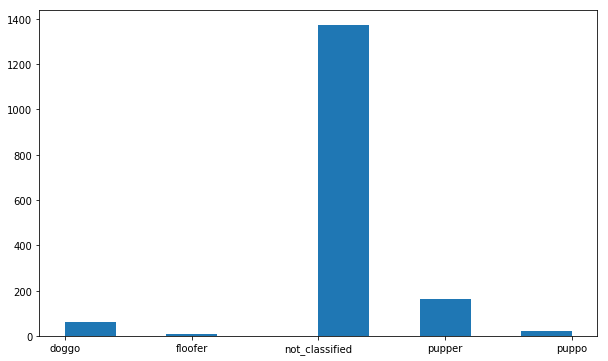

In [225]:
plt.show()
df_master['dog_stage'].hist(figsize=(10,6),grid=False,xlabelsize=10)

In [226]:
df_master['dog_stage'].value_counts()

not_classified    1371
pupper             162
doggo               63
puppo               21
floofer              7
Name: dog_stage, dtype: int64

In [227]:
df_master['breed'].value_counts()

golden_retriever               152
Labrador_retriever             105
Pembroke                        93
Chihuahua                       90
pug                             58
toy_poodle                      47
chow                            44
Pomeranian                      41
Samoyed                         41
malamute                        31
French_bulldog                  31
Chesapeake_Bay_retriever        30
cocker_spaniel                  28
miniature_pinscher              25
German_shepherd                 21
Staffordshire_bullterrier       21
Siberian_husky                  20
Eskimo_dog                      20
Shih-Tzu                        20
Cardigan                        20
Rottweiler                      19
Maltese_dog                     18
Shetland_sheepdog               18
Lakeland_terrier                17
basset                          17
Italian_greyhound               17
beagle                          17
kuvasz                          17
West_Highland_white_

In [228]:
df_master['name'].value_counts()

Unnamed       456
Charlie        10
Cooper         10
Lucy            9
Tucker          9
Oliver          9
Penny           8
Sadie           7
Winston         7
Daisy           7
Koda            6
Jax             6
Lola            6
Toby            6
Rusty           5
Bo              5
Bella           5
Stanley         5
Oscar           5
Leo             5
Finn            4
Scout           4
Gus             4
Chester         4
George          4
Jack            4
Sophie          4
Scooter         4
Duke            4
Bear            4
             ... 
Gustav          1
Todo            1
Davey           1
Baloo           1
Puff            1
Christoper      1
Ed              1
Kuyu            1
Tyrone          1
Chloe           1
Stark           1
Jerome          1
Toffee          1
Sobe            1
Ester           1
Marq            1
Willie          1
Kulet           1
Zoe             1
Milky           1
Darrel          1
Pluto           1
Mason           1
Remy            1
Jebberson 

In [229]:
#analysing the tweets with max() retweets or near to max()
i=df_master['retweets'].idxmax()
df_master.iloc[i-4]

tweet_id                                             744995568523612160
timestamp                                           2016-06-20 20:49:19
text                  This is Abby. She got her face stuck in a glas...
rating_numerator                                                      9
rating_denominator                                                   10
name                                                               Abby
dog_stage                                                         puppo
favorites                                                          2783
retweets                                                            572
jpg_url                 https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg
breed                                              Old_English_sheepdog
Name: 665, dtype: object

In [230]:
#limiting the dataset to a subdataset with only the 20 largest retweets rows
df_ret=df_master.nlargest(20, columns=['retweets'])
df_ret['retweets']

669     71448.0
697     53406.0
352     52224.0
269     40364.0
52      37802.0
289     34864.0
99      30530.0
1201    28916.0
120     26546.0
295     25384.0
85      22991.0
394     22208.0
112     20166.0
695     19465.0
1184    17118.0
259     16547.0
587     16472.0
132     16312.0
58      15964.0
6       15914.0
Name: retweets, dtype: float64

In [231]:
#Creating a year column to be able to analyse data by year
df_master['year']=pd.DatetimeIndex(df_master['timestamp']).year
df_master['year'].unique()


array([2017, 2016, 2015])

In [232]:
#Number o tweets in 2015
df_master.groupby(df_master['year']==2015)['tweet_id'].count()

year
False    1133
True      491
Name: tweet_id, dtype: int64

In [233]:
#Number of retweets in 2015
df_master.groupby(df_master['year']==2015)['retweets'].sum()

year
False    3298472.0
True      415212.0
Name: retweets, dtype: float64

In [234]:
#Number of tweets in 2016
df_master.groupby(df_master['year']==2016)['tweet_id'].count()

year
False    802
True     822
Name: tweet_id, dtype: int64

In [235]:
#Number of retweets in 2016
df_master.groupby(df_master['year']==2016)['retweets'].sum()

year
False    1934893.0
True     1778791.0
Name: retweets, dtype: float64

In [236]:
#Number of tweets in 2017
df_master.groupby(df_master['year']==2017)['tweet_id'].count()

year
False    1313
True      311
Name: tweet_id, dtype: int64

In [237]:
#Number of retweets in 2017
df_master.groupby(df_master['year']==2017)['retweets'].sum()

year
False    2194003.0
True     1519681.0
Name: retweets, dtype: float64

In [264]:
#Most popular names by year
df_master.groupby(df_master['year']).name.get_group(2017).value_counts()


Unnamed     57
Charlie      4
Stanley      3
Boomer       3
Tucker       3
Daisy        3
Bentley      2
Bella        2
Scooter      2
Wilson       2
Bear         2
Winston      2
Oliver       2
Lola         2
Wyatt        2
Zoey         2
Walter       2
Leo          2
Lucy         2
Penny        2
Jack         2
Paisley      2
quite        2
Hobbes       2
Cash         2
Zeke         2
Nelly        2
Jarod        1
Reggie       1
Crawford     1
            ..
Ash          1
Stuart       1
Belle        1
Lilly        1
Sweet        1
Jeffrey      1
Jarvis       1
Emanuel      1
Kevin        1
Harry        1
Neptune      1
Koda         1
George       1
Roscoe       1
Milky        1
Gary         1
Einstein     1
Malcolm      1
Quinn        1
Mia          1
Vixen        1
Alice        1
Ike          1
Hank         1
Wafer        1
Kuyu         1
Scout        1
Shadow       1
Jerry        1
Dante        1
Name: name, Length: 223, dtype: int64

### Insights:

1. As expected the more retweets the more likes and vice versa there is a positive proportional relationship between the variables, very evident on the scatterplot

2.The 10 most popular names (decrescent order) are:Charlie, Cooper, Lucy, Oliver, Tucker, Penny, Daisy, Winston, Sadie, Jax


3. The 10 most popular breeds (decrescent order) are:Golden_Retriever,Labrador_Retriever, Pembroke, Chihuahua, Pug, Toy-poodle, Chow, Samoyed, Pomeranian, French_bulldog


4.In 2015: 491 tweets ,415212 retweets. In 2016: 822 tweets ,1778791 retweets. In2017: 311 tweets ,1519681 retweets

### Visualization

Text(0,0.5,'Number of Likes')

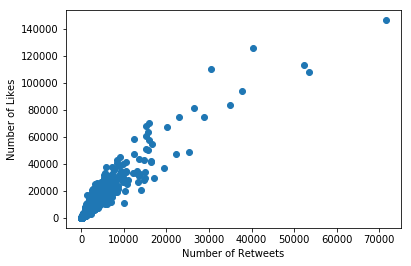

In [115]:
plt.scatter(data=df_master,x='retweets',y='favorites')
plt.xlabel('Number of Retweets')
plt.ylabel('Number of Likes')

year
2015    491
2016    822
2017    311
Name: tweet_id, dtype: int64

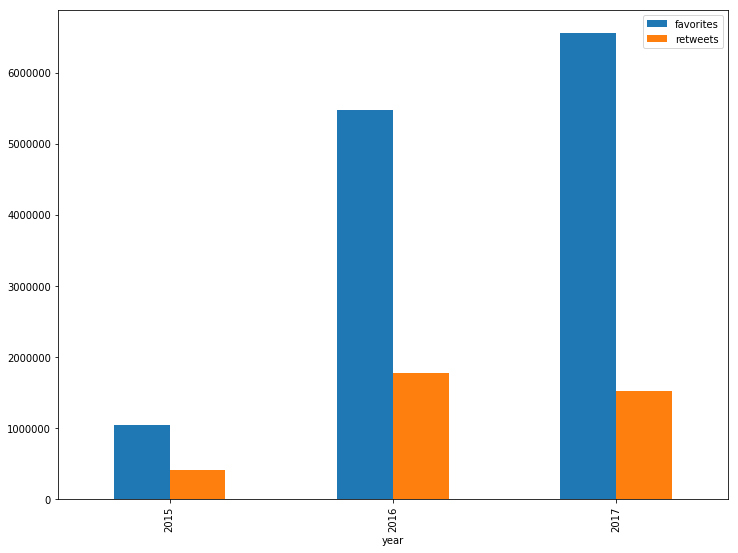

In [137]:
# summary od retweets and tweets by year, visually on clustered bar plot
df_master.groupby(df_master['year'])['favorites','retweets'].sum().plot.bar(legend=True,figsize= (12,9))
df_master.groupby(df_master['year'])['tweet_id'].count()